In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf


In [2]:
dataset=tf.keras.preprocessing.image_dataset_from_directory("Waste")

Found 22564 files belonging to 2 classes.


IMPORTING LIBRARIES

In [3]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

DEFINING PARAMETERS

In [4]:
IMAGE_SIZE=(250,250)
BATCH_SIZE=200
CHANNELS=3
EPOCHS=15

IMPORTING DATA TO BE USED

In [5]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "Waste",
    shuffle=True,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)


Found 22564 files belonging to 2 classes.


GATHERING INSIGHTS

In [6]:
class_names=dataset.class_names
class_names

['Organic', 'Recyclable']

In [7]:
len(dataset)

113

In [8]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(200, 250, 250, 3)
[1 0 1 0 1 0 1 0 0 1 1 1 1 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0
 0 1 0 1 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 1 0 1 0
 1 1 1 0 1 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0
 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 0 1 1 0 0 0 1 1 1 0 1 1 0 0 1
 0 0 1 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 1 1 0 1
 1 1 1 1 0 0 1 0 1 0 0 0 1 1 0]


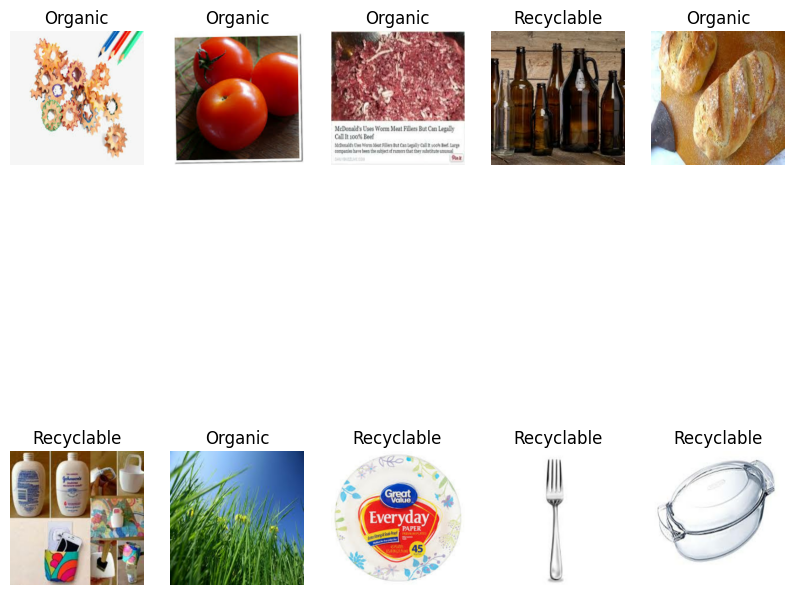

In [9]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(10):
        ax=plt.subplot(2,5,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

SPLITTING OF TRAINING AND TESTING DATA

In [10]:
len(dataset)

113

In [11]:
train_size=0.8
len(dataset)*train_size

90.4

In [12]:
train_ds=dataset.take(90)
len(train_ds)

90

In [13]:
test_ds=dataset.skip(90)
len(test_ds)

23

In [14]:
val_size=0.1
len(dataset)*val_size

11.3

In [15]:
val_ds=test_ds.take(11)
len(val_ds)

11

In [16]:
test_ds=test_ds.skip(11)
len(test_ds)

12

DATA PRE-PROCESSING

In [17]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [18]:
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(250,250),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [19]:
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

CREATING CNN MODEL

In [20]:
input_shape=(BATCH_SIZE, 250, 250, CHANNELS)
n_classes=2

model=models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size= (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)
    

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (200, 250, 250, 3)        0         
                                                                 
 sequential_1 (Sequential)   (200, 250, 250, 3)        0         
                                                                 
 conv2d (Conv2D)             (200, 248, 248, 32)       896       
                                                                 
 max_pooling2d (MaxPooling2  (200, 124, 124, 32)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (200, 122, 122, 64)       18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (200, 61, 61, 64)         0         
 g2D)                                                 

MODEL TRAINING(FITTING)

In [22]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [23]:
history= model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/15
90/90 [==============================] - 1675s 18s/step - loss: 0.4927 - accuracy: 0.7743 - val_loss: 0.4336 - val_accuracy: 0.8223
Epoch 2/15
90/90 [==============================] - 1575s 17s/step - loss: 0.4345 - accuracy: 0.8065 - val_loss: 0.4003 - val_accuracy: 0.8259
Epoch 3/15
90/90 [==============================] - 1538s 17s/step - loss: 0.4185 - accuracy: 0.8148 - val_loss: 0.4143 - val_accuracy: 0.8168
Epoch 4/15
90/90 [==============================] - 1820s 20s/step - loss: 0.4069 - accuracy: 0.8231 - val_loss: 0.3824 - val_accuracy: 0.8432
Epoch 5/15
90/90 [==============================] - 1528s 17s/step - loss: 0.3997 - accuracy: 0.8252 - val_loss: 0.3798 - val_accuracy: 0.8368
Epoch 6/15
90/90 [==============================] - 1674s 19s/step - loss: 0.3848 - accuracy: 0.8322 - val_loss: 0.3666 - val_accuracy: 0.8523
Epoch 7/15
90/90 [==============================] - 1698s 19s/step - loss: 0.3811 - accuracy: 0.8333 - val_loss: 0.3606 - val_accuracy: 0.8509

In [24]:
scores= model.evaluate(test_ds)


12/12 [==============================] - 42s 2s/step - loss: 0.3376 - accuracy: 0.8613


MODEL ACCURACY

INCREASING MODEL ACCURACY IS EASILY ACHIEVABLE BY RUNNING MORE EPOCHS, HOWEVER DUE TO TIME CONSTRAINTS AND AN INEFFICIENT SYSTEM,WE ARE UNABLE TO DO SO.

In [25]:
scores

[0.3375517427921295, 0.8612521290779114]

history

In [27]:
history.params


{'verbose': 1, 'epochs': 15, 'steps': 90}

In [28]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [29]:
len(history.history['accuracy'])

15

TRAINING DATA ACCURACY VS TESTING DATA ACCURACY

THIS GRAPH SUPPORTING MY ABOVE STATEMENT OF EASILY INCREASING ACCURACY AS WE CAN CLEARLY SEE IN GRAPH ACCURACY OF BOTH TESTING AND TRAINING DATA IS CONTINUOUSLY INCREASING ON RUNNING MORE AND MORE EPOCHS.

In [30]:
acc= history.history['accuracy']
val_acc= history.history['val_accuracy']
loss= history.history['loss']
val_loss= history.history['val_loss']


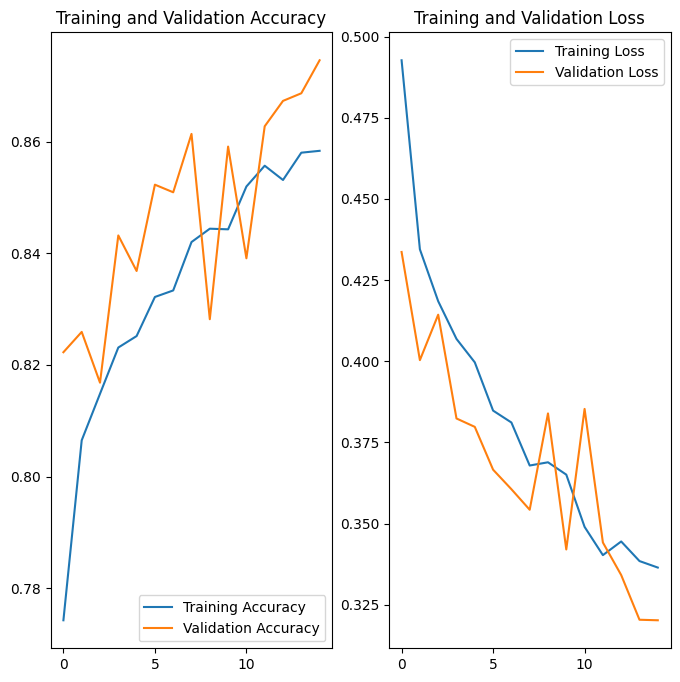

In [31]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

MODEL PREDICTION ON TESTING DATA

first image to predict
first image's actual label: Recyclable
7/7 [==============================] - 2s 256ms/step
predicted label: Recyclable


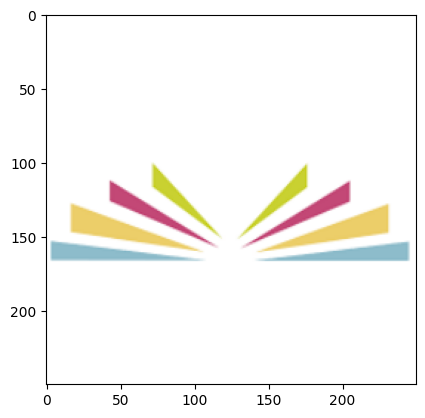

In [35]:
for images_batch, labels_batch in test_ds.take(1):
    first_image= (images_batch[0].numpy().astype('uint8'))
    first_label= labels_batch[0].numpy()
    print("first image to predict")
    plt.imshow(first_image)
    print("first image's actual label:",class_names[first_label])
    batch_prediction= model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [36]:
import numpy as np


In [37]:
def predict(model, img):
   img_array= tf.keras.preprocessing.image.img_to_array(images[i].numpy())
   img_array= tf.expand_dims(img_array, 0)
   predictions= model.predict(img_array)
   predicted_class= class_names[np.argmax(predictions[0])]
   confidence= round(100*(np.max(predictions[0])), 2)
   return predicted_class, confidence

1/1 [==============================] - 0s 43ms/step


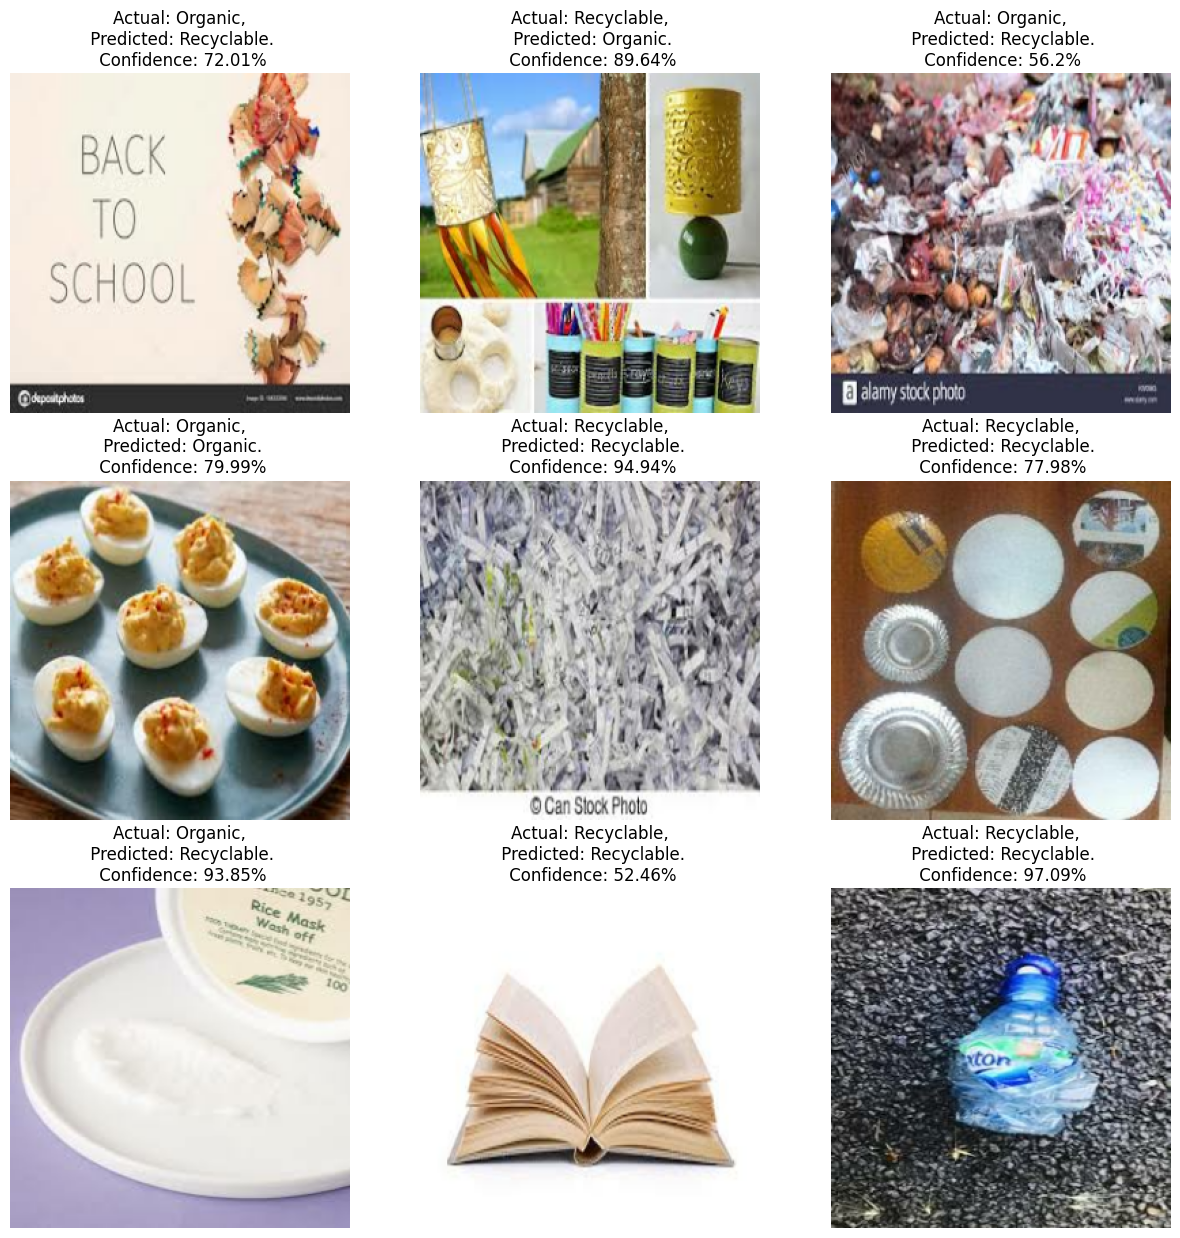

In [43]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
   for i in range(9):
      ax= plt.subplot(3,3,i+1)
      plt.imshow(images[i].numpy().astype("uint8"))
      predicted_class, confidence = predict(model, images[i].numpy())
      actual_class= class_names[labels[i]]
      plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
      plt.axis("off")

MODEL SAVING

In [42]:
import pickle




In [44]:
import pickle
with open("model_pickle",'wb') as file:
    pickle.dump(model,file)

In [45]:
with open('model_pickle','rb') as f:
    model=pickle.load(f)

MODEL PREDICTION ON IMAGE TAKEN FROM GOOGLE

In [46]:
import cv2

In [59]:
m=plt.imread('plastic.jpg')

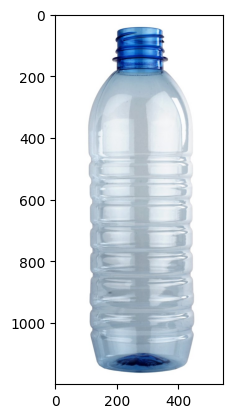

In [60]:
plt.imshow(m)
plt.show()

In [61]:
m.shape

(1199, 547, 3)

In [63]:
m=cv2.resize(m,(256,256))

In [75]:
test=m.reshape((1,256,256,3))

In [80]:
predict(model, test)

1/1 [==============================] - 0s 147ms/step


('Recyclable', 97.09)

In [83]:
n=plt.imread('OIP.jfif')

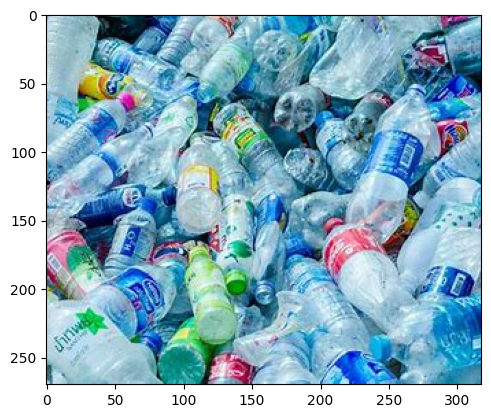

In [84]:
plt.imshow(n)
plt.show()

In [85]:
n.shape

(270, 318, 3)

In [87]:
n=cv2.resize(m,(256,256))

In [92]:
test=n.reshape(1,256,256,3)

In [93]:
predict(model, test)

1/1 [==============================] - 0s 41ms/step


('Recyclable', 97.09)

In [97]:
model_version=1
model.save(f"../model/{model_version}")

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('signature_function', 'signature_key'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('signature_function', 'signature_key'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('signature_function', 'signature_key'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
INFO:tensorflow:Assets written to: ../model/1\assets


INFO:tensorflow:Assets written to: ../model/1\assets


In [1]:
%%writefile app.py
import streamlit as st
import tensorflow as tf
import streamlit as st


@st.cache(allow_output_mutation=True)
def load_model():
  model=tf.keras.models.load_model('"C:\Users\ASUS\Desktop\Waste Segregation\Training\model\1"')
  return model
with st.spinner('Model is being loaded..'):
  model=load_model()

st.write("""
         # Material Classification
         """
         )

file = st.file_uploader("Please upload an brain scan file", type=["jpg", "png"])
import cv2
from PIL import Image, ImageOps
import numpy as np
st.set_option('deprecation.showfileUploaderEncoding', False)
def import_and_predict(image_data, model):
     size = (250,250)    
        image = ImageOps.fit(image_data, size, Image.ANTIALIAS)
        image = np.asarray(image)
        img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        #img_resize = (cv2.resize(img, dsize=(75, 75),    interpolation=cv2.INTER_CUBIC))/255.
        
        img_reshape = img[np.newaxis,...]
    
        prediction = model.predict(img_reshape)
        
        return prediction
if file is None:
    st.text("Please upload an image file")
else:
    image = Image.open(file)
    st.image(image, use_column_width=True)
    predictions = import_and_predict(image, model)
    score = tf.nn.softmax(predictions[0])
    st.write(prediction)
    st.write(score)
    print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)


Writing app.py


In [2]:
!pip install pyngrok

Defaulting to user installation because normal site-packages is not writeable

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.



     ---------------------------------------- 0.0/718.7 kB ? eta -:--:--
      --------------------------------------- 10.2/718.7 kB ? eta -:--:--
      --------------------------------------- 10.2/718.7 kB ? eta -:--:--
     - ----------------------------------- 30.7/718.7 kB 262.6 kB/s eta 0:00:03
     - ----------------------------------- 30.7/718.7 kB 262.6 kB/s eta 0:00:03
     - ----------------------------------- 30.7/718.7 kB 262.6 kB/s eta 0:00:03
     -- ---------------------------------- 41.0/718.7 kB 140.3 kB/s eta 0:00:05
     --- --------------------------------- 71.7/718.7 kB 196.3 kB/s eta 0:00:04
     ---- -------------------------------- 92.2/718.7 kB 249.8 kB/s eta 0:00:03
     ---- -------------------------------- 92.2/718.7 kB 249.8 kB/s eta 0:00:03
     ---- -------------------------------- 92.2/718.7 kB 249.8 kB/s eta 0:00:03
     ----- ------------------------------ 112.6/718.7 kB 226.0 kB/s eta 0:00:03
     ------- ---------------------------- 143.4/718.7 kB 2

In [12]:
!ngrok authtoken 2XXq5VkPE1EArii7B8dIUUoJmyX_6jiMXoid5yyAKzkcjrFbU

'ngrok' is not recognized as an internal or external command,
operable program or batch file.


In [5]:
import ngrok

In [7]:
import pyngrok

In [9]:
!pip install ngrok

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
# in ngrok.yml
authtoken: 2XXq5VkPE1EArii7B8dIUUoJmyX_6jiMXoid5yyAKzkcjrFbU